In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.Y[i]


class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [3]:
X = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
Y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

In [4]:
dataset = CustomDataset(X, Y)
dataloader = DataLoader(dataset)

In [5]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [6]:
loss_list = []
for epoch in range(100):
    running_loss = 0.0
    optimizer.zero_grad()
    
    for x, y in dataloader:
        y_p = model(x)
        loss = criterion(y_p, y)
        running_loss += loss

    running_loss = running_loss / len(dataloader)
    running_loss.backward()
    optimizer.step()
    
    print("The parameters are w={:.4f}, b={:.4f} and loss={:.4f}".format(model.linear.weight.item(), model.linear.bias.item(), running_loss.item()))
    loss_list.append(running_loss.item())

The parameters are w=0.7168, b=0.1155 and loss=50.7556
The parameters are w=0.8114, b=0.1208 and loss=7.2186
The parameters are w=0.8470, b=0.1229 and loss=1.0366
The parameters are w=0.8605, b=0.1236 and loss=0.1588
The parameters are w=0.8655, b=0.1239 and loss=0.0342
The parameters are w=0.8674, b=0.1240 and loss=0.0165
The parameters are w=0.8682, b=0.1241 and loss=0.0140
The parameters are w=0.8684, b=0.1241 and loss=0.0136
The parameters are w=0.8685, b=0.1241 and loss=0.0136
The parameters are w=0.8686, b=0.1241 and loss=0.0135
The parameters are w=0.8686, b=0.1242 and loss=0.0135
The parameters are w=0.8686, b=0.1242 and loss=0.0135
The parameters are w=0.8686, b=0.1242 and loss=0.0135
The parameters are w=0.8686, b=0.1242 and loss=0.0135
The parameters are w=0.8686, b=0.1242 and loss=0.0135
The parameters are w=0.8686, b=0.1242 and loss=0.0135
The parameters are w=0.8686, b=0.1242 and loss=0.0135
The parameters are w=0.8686, b=0.1242 and loss=0.0135
The parameters are w=0.8686

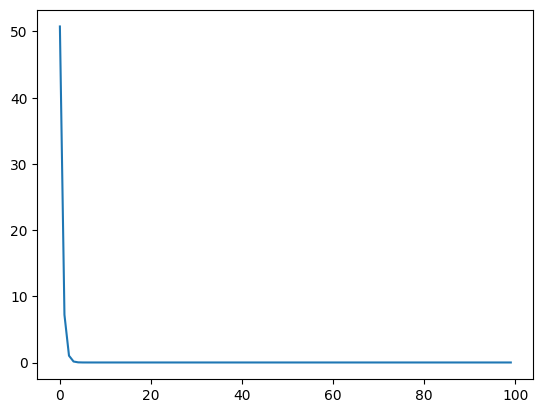

In [7]:
plt.plot(loss_list)
plt.show()